# 2024 CODE 2기 활동 "프로젝트로 배우는 데이터사이언스" 3주차 과제입니다.

 - 강의를 수강한 후 본 과제를 수행하세요.
 - 개별적으로 과제를 수행한 후 팀원과 과제를 공유하고, 팀별로 하나의 최종 결과물을 완성하세요.
 - 완성한 결과물을 티스토리에 작성하세요.
 - 과제 데이터셋에 대한 모든 전처리와 모델 학습에 대해 정해진 방법은 없습니다.

미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [1]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")

# 0.1 데이터 정보 파악



In [3]:
# info()를 사용해 데이터 타입, 결측치, 메모리 사용량 등의 정보를 본다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [4]:
# 데이터프레임의 윗 5줄을 보겠습니다.
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

## 0.1.1 dtype 변경

데이터 프레임을 봤을 때 수치형 데이터로는 tenure, MonthlyCharges, 그리고 TotalCharges가 있는 것을 볼 수 있습니다.

TotalCharges가 수치형 데이터이긴 하지만 ```df.info()```를 사용했을 때  ```dtype```이 ```object```로 설정되어 있는 것을 볼 수 있습니다.

반대로 SeniorCitizens 컬럼은 비록 숫자들로 구성되어 있긴 하나,






In [5]:
# SeniorCitizen 컬럼에 있는 원소 종류 확인
df['SeniorCitizen'].unique()

array([0, 1])

```df.unique()```를 사용하면 0과 1로만 구성되어 사실상 범주형 변수인 것을 볼 수 있습니다.

그러므로 TotalCharges를 수치형 변수로 변환하고, SeniorCitizen을 명목형 변수로 변환해 주겠습니다.

In [6]:
# TotalCharges를 수치형 변수로 변환합니다.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# SeniorCitizen을 범주형 변수로 변환합니다.
df['SeniorCitizen'] = df['SeniorCitizen'] == 1   # 1일 경우 True, 0일 경우 False로 치환

In [7]:
# 바뀐 dataframe을 다시 한번 보겠습니다.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female          False     Yes         No       1           No   
5575-GNVDE    Male          False      No         No      34          Yes   
3668-QPYBK    Male          False      No         No       2          Yes   
7795-CFOCW    Male          False      No         No      45           No   
9237-HQITU  Female          False      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

tenure, MonthlyCharges, 그리고 TotalCharges는 수치형 데이터(int64, float64),\
나머지는 범주형 데이터(object, bool)로 바뀐 것을 확인했습니다.

## 0.1.2 결측치 확인

각각의 수치형 변수 컬럼에 결측치가 있는지 확인해 주겠습니다.

In [8]:
# 결측치 여부를 구해서 df_null이라는 데이터프레임에 담습니다.
df_null = df.isnull()

# 각 항목별 결측치 개수와 퍼센티지를 확인합니다.
df_null.agg(["sum", "mean"])

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
sum      0.0            0.0      0.0         0.0     0.0           0.0   
mean     0.0            0.0      0.0         0.0     0.0           0.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
sum             0.0              0.0             0.0           0.0   
mean            0.0              0.0             0.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
sum                0.0          0.0          0.0              0.0       0.0   
mean               0.0          0.0          0.0              0.0       0.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
sum                0.0            0.0             0.0     11.000000    0.0  
mean               0.0            0.0             0.0      0.001562    0.0

TotalCharges에서만 11개의 결측치가 관찰됩니다.

아직 서비스 이용기간이 한달을 넘지 않았을 땐 (tenure이 0인 경우),\
아직 TotalCharges가 계산 불가하기 때문에 결측치로 남았을 수도 있습니다.

위 가설이 맞는지 확인해 보겠습니다.

In [9]:
# 수치형 컬럼들 중 값이 0인 원소들을 확인합니다.
df_zeros = df[['tenure', 'MonthlyCharges', 'TotalCharges']] == 0

# 각 항목별 0값의 개수와 퍼센티지를 확인합니다.
df_zeros.agg(['sum', 'mean']).transpose()

sum      mean
tenure          11.0  0.001562
MonthlyCharges   0.0  0.000000
TotalCharges     0.0  0.000000

tenure에서 11개의 0값이 확인되었습니다.

이는 TotalCharges의 결측치 개수와 동일합니다.

해당 행들을 표시해 보겠습니다.

In [10]:
# tenure가 0인 열들만 표시
df[df['tenure'] == 0]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
4472-LVYGI  Female          False     Yes        Yes       0           No   
3115-CZMZD    Male          False      No        Yes       0          Yes   
5709-LVOEQ  Female          False     Yes        Yes       0          Yes   
4367-NUYAO    Male          False     Yes        Yes       0          Yes   
1371-DWPAZ  Female          False     Yes        Yes       0           No   
7644-OMVMY    Male          False     Yes        Yes       0          Yes   
3213-VVOLG    Male          False     Yes        Yes       0          Yes   
2520-SGTTA  Female          False     Yes        Yes       0          Yes   
2923-ARZLG    Male          False     Yes        Yes       0          Yes   
4075-WKNIU  Female          False     Yes        Yes       0          Yes   
2775-SEFEE    Male          False      No        Yes       0          Yes   

               MultipleLines InternetService       OnlineSecurity  \
customerID                                                          
4472-LVYGI  No phone service             DSL                  Yes   
3115-CZMZD                No              No  No internet service   
5709-LVOEQ                No             DSL                  Yes   
4367-NUYAO               Yes              No  No internet service   
1371-DWPAZ  No phone service             DSL                  Yes   
7644-OMVMY                No              No  No internet service   
3213-VVOLG               Yes              No  No internet service   
2520-SGTTA                No              No  No internet service   
2923-ARZLG                No              No  No internet service   
4075-WKNIU               Yes             DSL                   No   
2775-SEFEE               Yes             DSL                  Yes   

                   OnlineBackup     DeviceProtection          TechSupport  \
customerID                                                                  
4472-LVYGI                   No                  Yes                  Yes   
3115-CZMZD  No internet service  No internet service  No internet service   
5709-LVOEQ                  Yes                  Yes                   No   
4367-NUYAO  No internet service  No internet service  No internet service   
1371-DWPAZ                  Yes                  Yes                  Yes   
7644-OMVMY  No internet service  No internet service  No internet service   
3213-VVOLG  No internet service  No internet service  No internet service   
2520-SGTTA  No internet service  No internet service  No internet service   
2923-ARZLG  No internet service  No internet service  No internet service   
4075-WKNIU                  Yes                  Yes                  Yes   
2775-SEFEE                  Yes                   No                  Yes   

                    StreamingTV      StreamingMovies  Contract  \
customerID                                                       
4472-LVYGI                  Yes                   No  Two year   
3115-CZMZD  No internet service  No internet service  Two year   
5709-LVOEQ                  Yes                  Yes  Two year   
4367-NUYAO  No internet service  No internet service  Two year   
1371-DWPAZ                  Yes                   No  Two year   
7644-OMVMY  No internet service  No internet service  Two year   
3213-VVOLG  No internet service  No internet service  Two year   
2520-SGTTA  No internet service  No internet service  Two year   
2923-ARZLG  No internet service  No internet service  One year   
4075-WKNIU                  Yes                   No  Two year   
2775-SEFEE                   No                   No  Two year   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
customerID                                                               
4472-LVYGI              Yes  Bank transfer (automatic)           52.55   
3115-CZMZD               No  

tenure가 0인 열들은 TotalCharges도 NaN인것으로 확인했습니다.\
이로서 위의 가설이 맞다는 것을 확인할 수 있습니다.

* 결측치 수가 적어서 별도의 시각화는 하지 않겠습니다.

이 결측치들은 그럼 사실상 결측치가 아니라 0값이 합당하다고 고려할 수 있습니다. (아직 청구된 총 요금이 없기 때문)

그러므로 해당 NaN값들을 전부 0으로 바꾸어 주겠습니다.

In [11]:
# NaN 값을 0으로 치환
df['TotalCharges'].fillna(0, inplace=True)

---

# Q1. 수치형 변수를 범주형 변수로 변환하기
- MonthlyCharges 변수를 범주형으로 변환하세요.
- MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.
- 원본과 구간을 나눈 데이터를 시각화하여 비교하세요.


 아래는 예시자료입니다. 예시자료는 참고용으로만 사용하세요.


| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:--------------------|
| 7590-VHVEG   |            29.85 | A                   |
| 5575-GNVDE   |            56.95 | C                   |
| 3668-QPYBK   |            53.85 | C                   |
| 7795-CFOCW   |            42.3  | B                   |
| 9237-HQITU   |            70.7  | D                   |



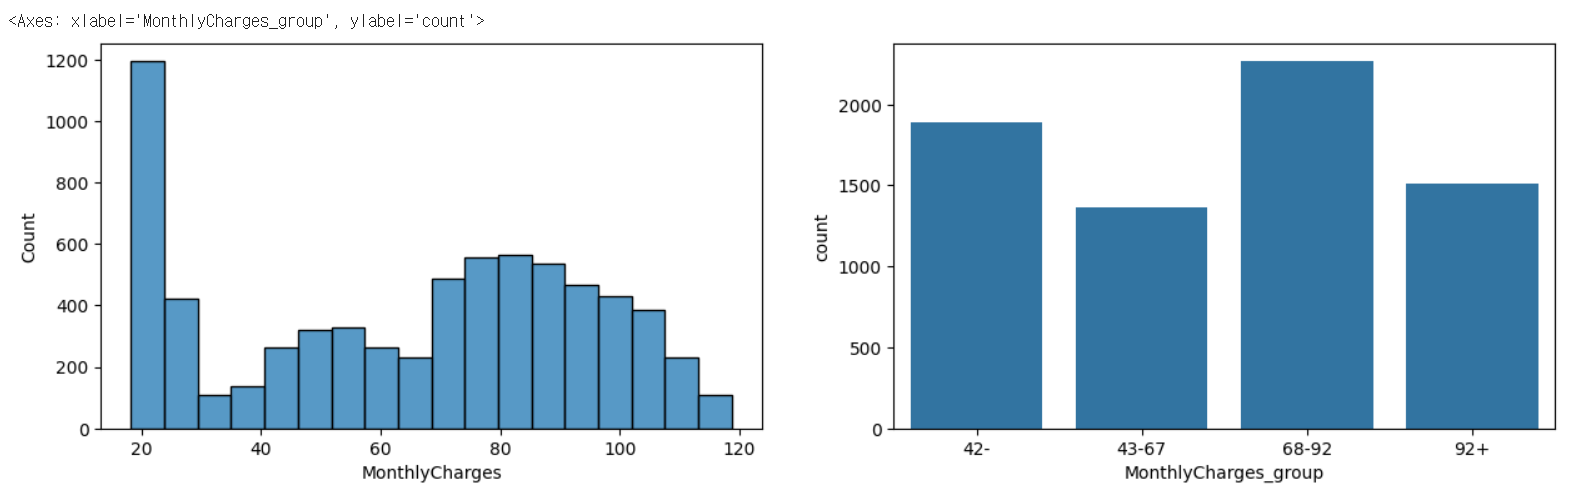

# 1.1 MonthlyCharges 범주형 변수로 변환

## 1.1.1 MonthlyCharges 시각화

Churn의 비율을 좀 더 편리하게 시각화 하기 위해서 'No'와 'Yes'를\
각각 0과 1로 치환해 주겠습니다.

또한 이탈 여부에 따른 시각화를 위해 dataframe을 나누어 주겠습니다.


In [12]:
# Churn의 값들을 0과 1로 치환합니다.
df_churn = df['Churn'] == 'Yes'
df['Churn'] = df_churn.astype(int)

In [13]:
df_0 = df[df['Churn'] == 0]
df_1 = df[df['Churn'] == 1]

# 각 dataframe의 열의 개수를 봅니다.
df_0.shape, df_1.shape

((5174, 20), (1869, 20))

MonthlyCharges의 히스토그램을 보도록 하겠습니다.

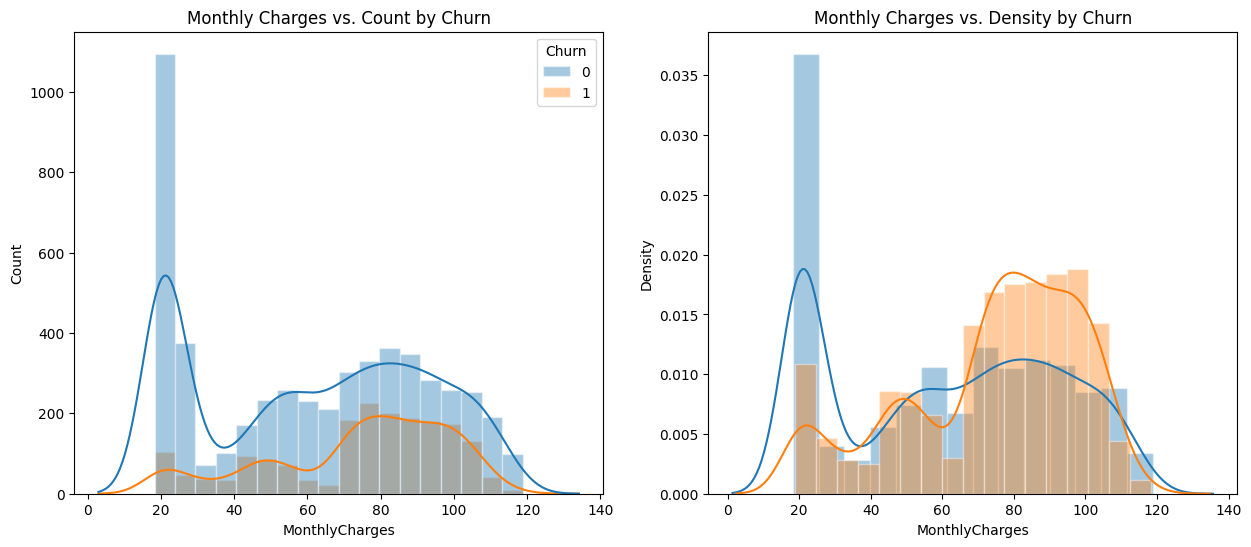

In [14]:
# 두 그래프를 양옆으로 볼 틀을 할당합니다.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# histplot에서 자주 사용할 인수들을 dict로 만들어 저장합니다.
common_args = dict(
    kde=True,                   # Kernel Density Estimate 표시
    kde_kws=dict(cut=3),        # KDE 곡선을 그래프 양 옆 끝까지 연장
    alpha=.4,                   # 막대색을 더 투명하게
    edgecolor=(1, 1, 1, .4))    # 막대를 감싸는 선을 투명하게

# 좌측 빈도 그래프 시각화 # 월별 요금에 따른 이탈 빈도를 시각화 합니다.
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', stat='count', **common_args, ax=axes[0])

# 우측 분포도 그래프 시각화 # 월별 요금에 따른 이탈 비율를 시각화 합니다.
sns.histplot(df_0['MonthlyCharges'], stat='density', **common_args, ax=axes[1])
sns.histplot(df_1['MonthlyCharges'], stat='density', **common_args, ax=axes[1])

# 제목 할당
axes[0].set_title('Monthly Charges vs. Count by Churn')
axes[1].set_title('Monthly Charges vs. Density by Churn')

plt.show()

MonthlyCharges 대비 Churn 특징:

* 일정한 정규분포가 아닌 다봉분포의 모습이 보입니다.
    * 밀집된 구간이 생기는 이유가 추가적 서비스 제공(요금제)에 따른 월별 가격인상 때문이라는 가설을 세워 볼 수 있습니다.
    * 이때 고객들이 가장 비싼 요금제에 가장 만족하지 않는 다는 것을 볼 수 있습니다.

## 1.1.2 MonthlyCharges 범주 나누기

시각화한 Histogram을 보았을 때 kde곡선이 낮아지는 곳들을 기점으로 범주를 나누면 그 범주들에 포함된 샘플들의 이탈 비율도 서로 확연하게 차이가 날 것 처럼 보입니다.

하지만 시각적으로만 범주를 판단하는 것은 그다지 좋은 방법이 아니기에 Supervised Binning의 일종인 Entropy Based Binning을 사용하여 데이터를 범주화 하겠습니다.



### 1.1.2.1 Entropy Based Binning이란?

데이터와 그에 따른 결과값이 있을 때, 각 범주 경계가 범주 별 결과값의 차이를 극대화 시키는 방식입니다.

자세한 설명은 [링크1](https://www.saedsayad.com/supervised_binning.htm) 또는 [링크2](https://natmeurer.com/a-simple-guide-to-entropy-based-discretization/)를 참조하시면 좋을 것 같습니다.

### 1.1.2.2 Entropy Based Binning 코드

In [15]:
def entropy(labels):
    """결과 값의 리스트를 받아 엔트로피를 계산합니다."""
    prob = labels.value_counts() / labels.count()
    return -np.sum(prob * np.log2(prob))

def calculate_information_gain(data, split):
    """분할된 데이터를 받아 해당 분할의 entropy gain을 구합니다."""
    total_entropy = entropy(data)
    left_entropy = entropy(split[0])
    right_entropy = entropy(split[1])
    n = len(data)
    left_ratio = len(split[0]) / n
    right_ratio = len(split[1]) / n
    return total_entropy - (left_ratio * left_entropy + right_ratio * right_entropy)

def find_best_split(data, target):
    """Find the best split for a continuous variable based on entropy gain."""
    best_gain = 0
    best_threshold = None

    unique_values = sorted(data.unique())
    for i in range(1, len(unique_values)):
        threshold = (unique_values[i - 1] + unique_values[i]) / 2
        split = (target[data <= threshold], target[data > threshold])
        gain = calculate_information_gain(target, split)
        if gain > best_gain:
            best_gain = gain
            best_threshold = threshold

    return best_threshold

### 1.1.2.3 EBB 적용

In [16]:
# 첫번째 threshold 찾기 (데이터 전체에서)
best_threshold = find_best_split(df.MonthlyCharges, df.Churn)

print("Best threshold for binning MonthlyCharges:", best_threshold)

Best threshold for binning MonthlyCharges: 27.674999999999997


다음 threshold를 찾으러 방금 threshold보다 높은 샘플들 중에서 다시 찾습니다.

In [17]:
df_27_up = df.loc[df.MonthlyCharges > 27.674999999999997]

# Find the best splits for MonthlyCharges to create num_bins
best_threshold = find_best_split(df_27_up.MonthlyCharges, df_27_up.Churn)

print("Best threshold for binning MonthlyCharges:", best_threshold)

Best threshold for binning MonthlyCharges: 68.82499999999999


위 방식을 반복합니다.

In [18]:
df_69_up = df.loc[df.MonthlyCharges > 68.82499999999999]

# Find the best splits for MonthlyCharges to create num_bins
best_threshold = find_best_split(df_69_up['MonthlyCharges'], df_69_up['Churn'])

print("Best threshold for binning MonthlyCharges:", best_threshold)

Best threshold for binning MonthlyCharges: 106.775


처음 기준 아래쪽의 threshold도 구해봅니다.

In [19]:
df_27_down = df.loc[df.MonthlyCharges < 27.674999999999997]

# Find the best splits for MonthlyCharges to create num_bins
best_threshold = find_best_split(df_27_down['MonthlyCharges'], df_27_down['Churn'])

print("Best threshold for binning MonthlyCharges:", best_threshold)

Best threshold for binning MonthlyCharges: 25.924999999999997


In [20]:
df_26_down = df.loc[df.MonthlyCharges < 25.924999999999997]

# Find the best splits for MonthlyCharges to create num_bins
best_threshold = find_best_split(df_26_down['MonthlyCharges'], df_26_down['Churn'])

print("Best threshold for binning MonthlyCharges:", best_threshold)

Best threshold for binning MonthlyCharges: 20.875


In [21]:
df_21_down = df.loc[df.MonthlyCharges < 20.875]

# Find the best splits for MonthlyCharges to create num_bins
best_threshold = find_best_split(df_21_down['MonthlyCharges'], df_21_down['Churn'])

print("Best threshold for binning MonthlyCharges:", best_threshold)

Best threshold for binning MonthlyCharges: 20.275


지금까지 나온 threshold들의 information gain을 한꺼번에 보겠습니다.

In [22]:
for i in [20.275,
          20.875,
          25.924999999999997,
          27.674999999999997,
          68.82499999999999,
          106.775]:
    split = (df.Churn[df.MonthlyCharges <= i], df.Churn[df.MonthlyCharges > i])
    print(f"gain : {calculate_information_gain(df.Churn, split)}")

gain : 0.018444536596283423
gain : 0.028004125442451566
gain : 0.03652126225154595
gain : 0.03836657890861295
gain : 0.03595162948276731
gain : 0.0026846492700574043


*   25.924999999999997
*   27.674999999999997
*   68.82499999999999

이 세 값이 가장 큰 gain을 보여줍니다.



### 1.1.2.4 bin 적용

In [24]:
bins = [0, 27.674999999999997, 68.82499999999999, 106.775, max(df.MonthlyCharges)]
labels = ["low", "middle", "high", "very_high"]

df['MonthlyCharges_binned'] = pd.cut(df.MonthlyCharges, bins=bins, labels=labels)

In [25]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female          False     Yes         No       1           No   
5575-GNVDE    Male          False      No         No      34          Yes   
3668-QPYBK    Male          False      No         No       2          Yes   
7795-CFOCW    Male          False      No         No      45           No   
9237-HQITU  Female          False      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
customerID                                                                ...   
7590-VHVEG  No phone service             DSL             No          Yes  ...   
5575-GNVDE                No             DSL            Yes           No  ...   
3668-QPYBK                No             DSL            Yes          Yes  ...   
7795-CFOCW  No phone service             DSL            Yes           No  ...   
9237-HQITU                No     Fiber optic             No           No  ...   

           TechSupport StreamingTV StreamingMovies        Contract  \
customerID                                                           
7590-VHVEG          No          No              No  Month-to-month   
5575-GNVDE          No          No              No        One year   
3668-QPYBK          No          No              No  Month-to-month   
7795-CFOCW         Yes          No              No        One year   
9237-HQITU          No          No              No  Month-to-month   

           PaperlessBilling              PaymentMethod MonthlyCharges  \
customerID                                                              
7590-VHVEG              Yes           Electronic check          29.85   
5575-GNVDE               No               Mailed check          56.95   
3668-QPYBK              Yes               Mailed check          53.85   
7795-CFOCW               No  Bank transfer (automatic)          42.30   
9237-HQITU              Yes           Electronic check          70.70   

            TotalCharges  Churn  MonthlyCharges_binned  
customerID                                              
7590-VHVEG         29.85      0                 middle  
5575-GNVDE       1889.50      0                 middle  
3668-QPYBK        108.15      1                 middle  
7795-CFOCW       1840.75      0                 middle  
9237-HQITU        151.65      1                   high  

[5 rows x 21 columns]

MonthlyCharges_binned 컬럼이 생긴 것을 볼 수 있습니다.

### 1.1.2.5 범주형 데이터 시각화

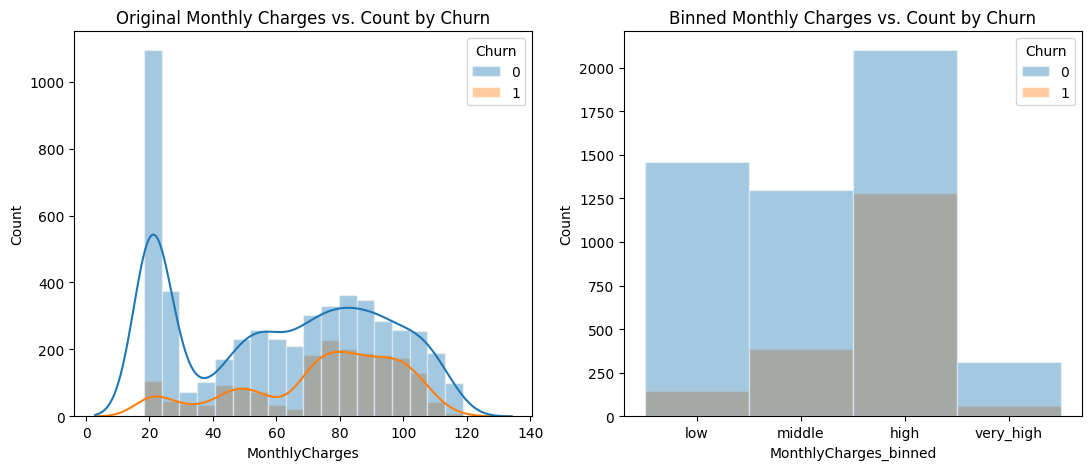

In [26]:
# 두 그래프를 양옆으로 볼 틀을 할당합니다.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# 좌측 빈도 그래프 시각화 # 월별 요금에 따른 이탈 빈도를 시각화 합니다.
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', stat='count', **common_args, ax=axes[0])

# 우측 분포도 그래프 시각화 # 월별 요금에 따른 이탈 비율를 시각화 합니다.
sns.histplot(data=df, x='MonthlyCharges_binned', hue='Churn', stat='count', alpha=.4, edgecolor=(1,1,1,.4), ax=axes[1])

# 제목 할당
axes[0].set_title('Original Monthly Charges vs. Count by Churn')
axes[1].set_title('Binned Monthly Charges vs. Count by Churn')

plt.show()

---

#Q2. 범주형 변수를 원핫인코딩을 통해 변환해주세요

- 모든 범주형 변수를 원핫인코딩으로 변환해주세요.

 아래는 예시자료입니다. 예시자료는 참고용으로만 사용해주세요.

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


# 2.1 범주형 변수들을 Encoding
모델에 학습을 시키위해 범주형 변수들을 인코딩 해주겠습니다.


In [27]:
df.nunique()

gender                      2
SeniorCitizen               2
Partner                     2
Dependents                  2
tenure                     73
PhoneService                2
MultipleLines               3
InternetService             3
OnlineSecurity              3
OnlineBackup                3
DeviceProtection            3
TechSupport                 3
StreamingTV                 3
StreamingMovies             3
Contract                    3
PaperlessBilling            2
PaymentMethod               4
MonthlyCharges           1585
TotalCharges             6531
Churn                       2
MonthlyCharges_binned       4
dtype: int64

범주형 변수들을 봤을때,
* gender
* SeniorCitizen
* Partner
* Dependents
* PhoneService
* PaperlessBilling
위 항목들은 각각 2 종류의 값을 갖고 있고, 나머지 범주형 변수들은 3 종류 이상의 값을 갖고 있습니다. (Churn은 타겟값이기 때문에 비포함)

2 종류의 값을 갖고 있는 항목들은 LabelEncoder, 나머지 범주형 항목들은 OneHotEncoder를 통해 인코딩을 해주겠습니다.

이렇게 하는 이유는 예를 들어 gender 항목을 OneHotEncoding할 경우, gender_Male, gender_Female이 동일한 정보를 담아 메모리 낭비를 하기 때문입니다. 차라리 LabelEncoding으로 하나에 컬럼에 그 정보를 담는 것이 났다고 판단했습니다.

## 2.1.1 LabelEncoding 적용

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

le_df = pd.DataFrame(df[le_columns])

# Categorical 열을 Label Encoder를 이용해 numerical로 변경
le_df[le_columns] = le_df[le_columns].apply(lambda col: le.fit_transform(col))

In [29]:
le_df.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
customerID                                                             
7590-VHVEG       0              0        1           0             0   
5575-GNVDE       1              0        0           0             1   
3668-QPYBK       1              0        0           0             1   
7795-CFOCW       1              0        0           0             0   
9237-HQITU       0              0        0           0             1   

            PaperlessBilling  
customerID                    
7590-VHVEG                 1  
5575-GNVDE                 0  
3668-QPYBK                 1  
7795-CFOCW                 0  
9237-HQITU                 1

위에서 명시한 컬럼들이 값을 수치형으로 변환한 것을 볼 수 있습니다.

## 2.1.2 OneHotEncoding 적용

```pandas.get_dummies``` 대신 ```sklearn.preprocessing.OneHotEncoder``` 를 사용하는 이유는 [이 링크](https://psystat.tistory.com/136)를 참조하세요.

In [30]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', sparse_output=False)

# 범주형 컬럼만 추출
ohe_categorical_cols = df.drop(
    ['tenure','MonthlyCharges','TotalCharges','Churn',  # 수치형 변수
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'],  # LE적용 변수
    axis=1).columns

ohe_transformed_df = ohe.fit_transform(df[ohe_categorical_cols])

# 위 array를 dataframe으로 변환
ohe_df = pd.DataFrame(ohe_transformed_df, index=df.index, columns=ohe.get_feature_names_out())

In [31]:
ohe_df.head()

MultipleLines_No  MultipleLines_No phone service  \
customerID                                                     
7590-VHVEG               0.0                             1.0   
5575-GNVDE               1.0                             0.0   
3668-QPYBK               1.0                             0.0   
7795-CFOCW               0.0                             1.0   
9237-HQITU               1.0                             0.0   

            MultipleLines_Yes  InternetService_DSL  \
customerID                                           
7590-VHVEG                0.0                  1.0   
5575-GNVDE                0.0                  1.0   
3668-QPYBK                0.0                  1.0   
7795-CFOCW                0.0                  1.0   
9237-HQITU                0.0                  0.0   

            InternetService_Fiber optic  InternetService_No  \
customerID                                                    
7590-VHVEG                          0.0                 0.0   
5575-GNVDE                          0.0                 0.0   
3668-QPYBK                          0.0                 0.0   
7795-CFOCW                          0.0                 0.0   
9237-HQITU                          1.0                 0.0   

            OnlineSecurity_No  OnlineSecurity_No internet service  \
customerID                                                          
7590-VHVEG                1.0                                 0.0   
5575-GNVDE                0.0                                 0.0   
3668-QPYBK                0.0                                 0.0   
7795-CFOCW                0.0                                 0.0   
9237-HQITU                1.0                                 0.0   

            OnlineSecurity_Yes  OnlineBackup_No  ...  Contract_One year  \
customerID                                       ...                      
7590-VHVEG                 0.0              0.0  ...                0.0   
5575-GNVDE                 1.0              1.0  ...                1.0   
3668-QPYBK                 1.0              0.0  ...                0.0   
7795-CFOCW                 1.0              1.0  ...                1.0   
9237-HQITU                 0.0              1.0  ...                0.0   

            Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
customerID                                                               
7590-VHVEG                0.0                                      0.0   
5575-GNVDE                0.0                                      0.0   
3668-QPYBK                0.0                                      0.0   
7795-CFOCW                0.0                                      1.0   
9237-HQITU                0.0                                      0.0   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
7590-VHVEG                                    0.0   
5575-GNVDE                                    0.0   
3668-QPYBK                                    0.0   
7795-CFOCW                                    0.0   
9237-HQITU                                    0.0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
customerID                                                               
7590-VHVEG                             1.0                         0.0   
5575-GNVDE                             0.0                         1.0   
3668-QPYBK                             0.0                         1.0   
7795-CFOCW                             0.0                         0.0   
9237-HQITU                             1.0                         0.0   

            MonthlyCharges_binned_high  MonthlyCharges_binned_low  \
customerID                                                          
7590-VHVEG                         0.0                        0.0   
5575-GNVDE                         0.0                        0.0   
3668-QPYBK                         0.0        

## 2.1.3 데이터프레임 합치기
위에서 각각 인코딩한 컬럼들을 합쳐주겠습니다.

In [32]:
encoded_df = pd.concat([df[['tenure','MonthlyCharges','TotalCharges','Churn']], le_df, ohe_df], axis=1)
encoded_df.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender  \
customerID                                                        
7590-VHVEG       1           29.85         29.85      0       0   
5575-GNVDE      34           56.95       1889.50      0       1   
3668-QPYBK       2           53.85        108.15      1       1   
7795-CFOCW      45           42.30       1840.75      0       1   
9237-HQITU       2           70.70        151.65      1       0   

            SeniorCitizen  Partner  Dependents  PhoneService  \
customerID                                                     
7590-VHVEG              0        1           0             0   
5575-GNVDE              0        0           0             1   
3668-QPYBK              0        0           0             1   
7795-CFOCW              0        0           0             0   
9237-HQITU              0        0           0             1   

            PaperlessBilling  ...  Contract_One year  Contract_Two year  \
customerID                    ...                                         
7590-VHVEG                 1  ...                0.0                0.0   
5575-GNVDE                 0  ...                1.0                0.0   
3668-QPYBK                 1  ...                0.0                0.0   
7795-CFOCW                 0  ...                1.0                0.0   
9237-HQITU                 1  ...                0.0                0.0   

            PaymentMethod_Bank transfer (automatic)  \
customerID                                            
7590-VHVEG                                      0.0   
5575-GNVDE                                      0.0   
3668-QPYBK                                      0.0   
7795-CFOCW                                      1.0   
9237-HQITU                                      0.0   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
7590-VHVEG                                    0.0   
5575-GNVDE                                    0.0   
3668-QPYBK                                    0.0   
7795-CFOCW                                    0.0   
9237-HQITU                                    0.0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
customerID                                                               
7590-VHVEG                             1.0                         0.0   
5575-GNVDE                             0.0                         1.0   
3668-QPYBK                             0.0                         1.0   
7795-CFOCW                             0.0                         0.0   
9237-HQITU                             1.0                         0.0   

            MonthlyCharges_binned_high  MonthlyCharges_binned_low  \
customerID                                                          
7590-VHVEG                         0.0                        0.0   
5575-GNVDE                         0.0                        0.0   
3668-QPYBK                         0.0                        0.0   
7795-CFOCW                         0.0                        0.0   
9237-HQITU                         1.0                        0.0   

            MonthlyCharges_binned_middle  MonthlyCharges_binned_very_high  
customerID                                                                 
7590-VHVEG                           1.0                              0.0  
5575-GNVDE                           1.0                              0.0  
3668-QPYBK                           1.0                              0.0  
7795-CFOCW                           1.0                              0.0  
9237-HQITU                           0.0                              0.0  

[5 rows x 45 columns]

---

# Q3. 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가하세요.

- 여러 피처 엔지니어링 기법을 사용하여 모델의 성능을 향상시키세요.
- 피처 엔지니어링을 통해 모델의 정확도를 최대한 높여주세요. 최소 75이상으로 만드는 것이 미션입니다.



# 3.1 의사 결정 나무로 학습과 예측하기

머신 러닝 알고리즘을 가지고 오겠습니다.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=33)
model

DecisionTreeClassifier(random_state=33)

## 3.1.1 학습 / 예측 데이터셋 나누기
이전에 했던 대로 8:2의 비율로 학습:예측 데이터셋을 나누겠습니다.

In [34]:
def split_train_test(df, ratio, separate=False, label_name='', randomize=False):

    # 학습, 예측 데이터셋 나누기
    split_count = int(ratio*df.shape[0])

    if randomize:
        # 데이터 랜더마이징
        df = df.sample(frac = 1)

    # 학습 데이터셋 지정
    train = df[:split_count].copy()

    # 예측 데이터셋 지정
    test = df[split_count:].copy()

    print(f"학습 데이터: {train.shape[0]}개, 예측 데이터: {test.shape[0]}개")

    if separate:
        # 정답값 분리
        X_train = train.drop(label_name, axis=1)
        y_train = train[label_name]
        X_test = test.drop(label_name, axis=1)
        y_test = test[label_name]

        return X_train, y_train, X_test, y_test

    else:
        return train, test

In [35]:
X_train, y_train, X_test, y_test = split_train_test(encoded_df, 0.8, separate=True, label_name='Churn')

학습 데이터: 5634개, 예측 데이터: 1409개


## 3.1.2 기본 데이터 학습 및 예측
결측치만을 제외해준 Encoding한 데이터로 학습 및 예측을 하도록 하겠습니다.

In [36]:
# 학습에 사용할 항목들을 별도로 분류합니다. (범주화한 MonthlyCharges 컬럼들은 제외)
feature_names = X_train.columns.tolist()
unwanted_cols = ['MonthlyCharges_binned_low', 'MonthlyCharges_binned_middle',
                 'MonthlyCharges_binned_high', 'MonthlyCharges_binned_very_high']

feature_names = [col for col in feature_names if col not in unwanted_cols]

In [37]:
def test_model(model, X_train, y_train, X_test, feature_names):

    # 학습과정 진행
    model.fit(X_train[feature_names],y_train)

    # 예측
    y_predict = model.predict(X_test[feature_names])

    # 정확도 측정
    acc = accuracy_score(y_test,y_predict)*100
    return model, y_predict, acc

In [38]:
model1, y_predict1, acc1 = test_model(DecisionTreeClassifier(), X_train, y_train, X_test, feature_names)
print(f"정확도는 {acc1}입니다")

정확도는 74.09510290986515입니다


결측치만을 제외한 데이터로는 74.24의 정확도가 나옵니다.

각 feature 별 중요도를 시각화해서 보겠습니다.

<Axes: >

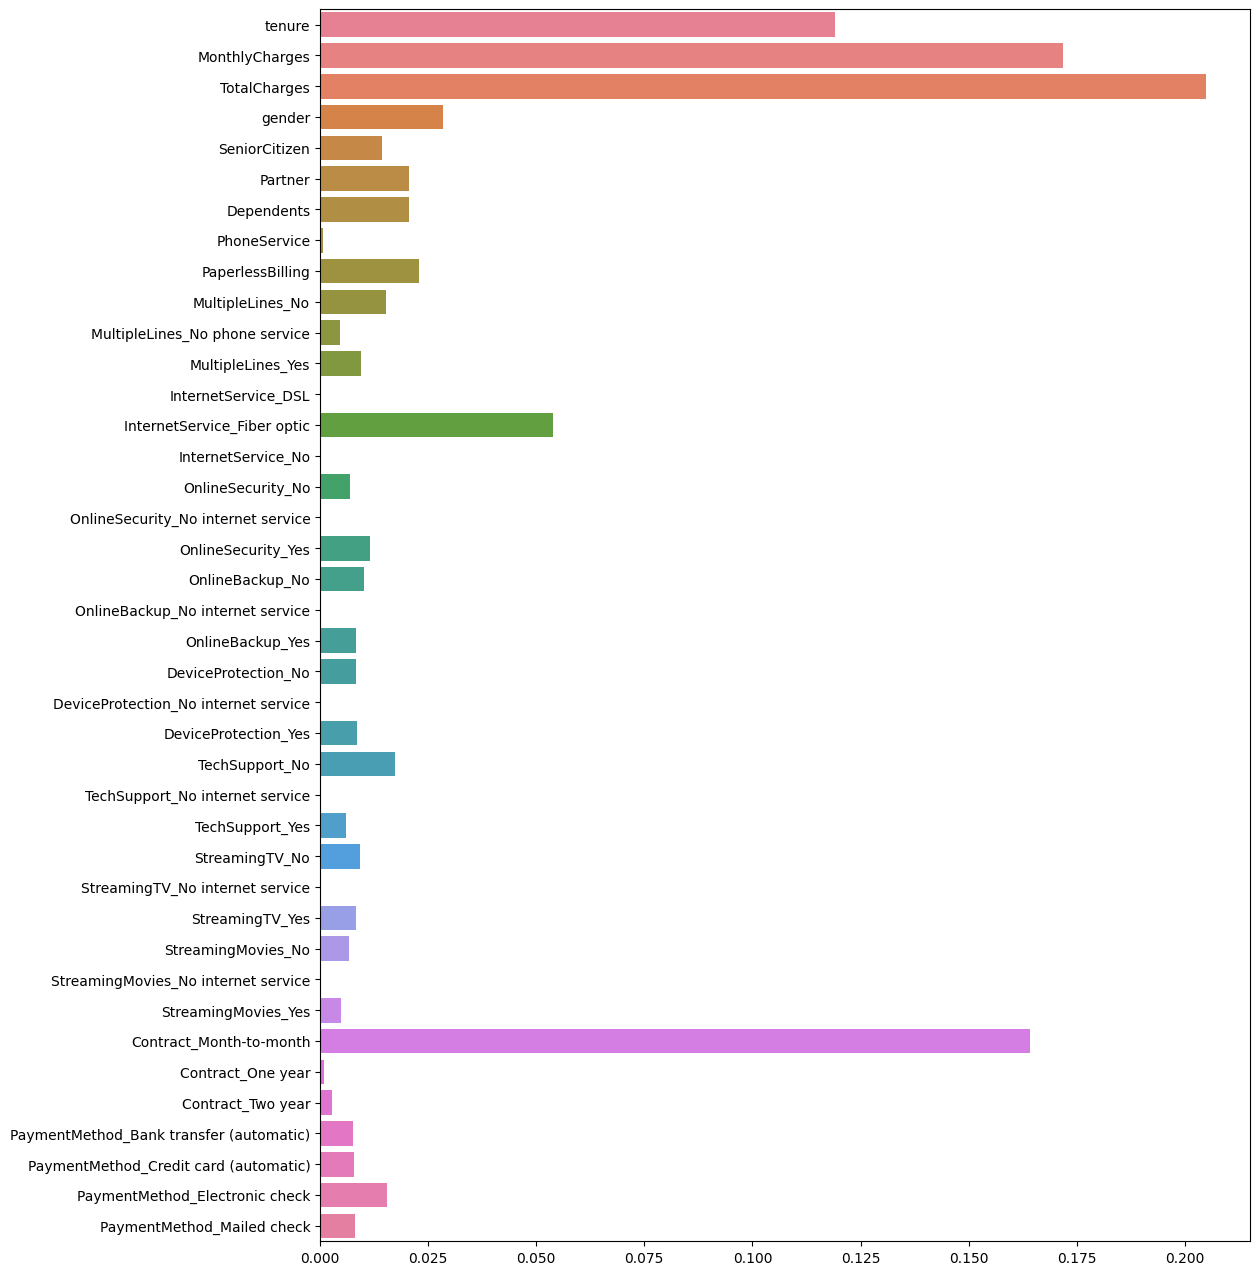

In [39]:
# feature_importance 시각화 하기
plt.figure(figsize=(12,16))
sns.barplot(x=model1.feature_importances_,y=feature_names, hue=feature_names)

Tenure, MonthlyCharges, TotalCharges, Contract_Month-to-month 항목들의 피쳐 중요도가 높게 나온것을 볼 수 있습니다.

## 3.1.2 MonthlyCharges를 범주화한 데이터로 학습 및 예측

In [40]:
# 학습에 사용할 항목들을 별도로 분류합니다.
feature_names  = X_train.columns.tolist()
feature_names.remove('MonthlyCharges')  # (MonthlyCharges 컬럼 제외)

In [41]:
# 정확도 출력
test_model(DecisionTreeClassifier(), X_train, y_train, X_test, feature_names)[2]

74.37899219304471

MonthlyCharges를 범주형 데이터로 바꾸어도 정확도가 크게 변하지 않는 것을 볼 수 있습니다.

이는 애초에 MonthlyCharges가 수치형 데이터 일때도 과적화(overfitting)이 별로 일어나지 않는다는 것을 의미할 수 있습니다.

## 3.1.3 TotalCharges 정규분포 형태로 변환

sklearn의 DecisionTreeModel이 정규분포 형태의 데이터를 더 잘 받아들일 수 있기에, TotalCharges의 분포를 정규분포 형태로 바꿔 주겠습니다.

### 3.1.3.1 TotalCharges 시각화

<Axes: xlabel='TotalCharges', ylabel='Count'>

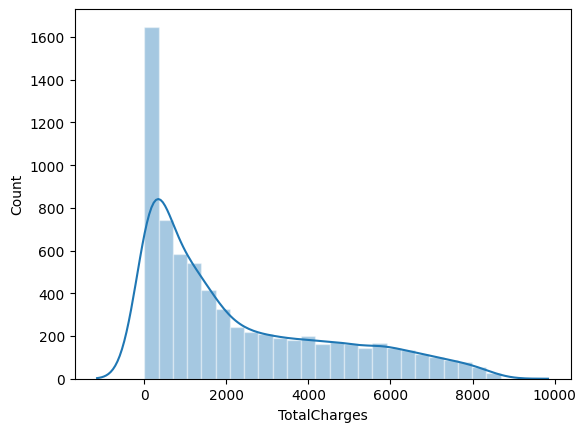

In [42]:
sns.histplot(data=df, x='TotalCharges', stat='count', **common_args)

In [43]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
qt_TC = qt.fit_transform(df.loc[:, ['TotalCharges']])
qt_df = encoded_df.copy()
qt_df['TotalCharges'] = qt_TC

<Axes: xlabel='TotalCharges', ylabel='Count'>

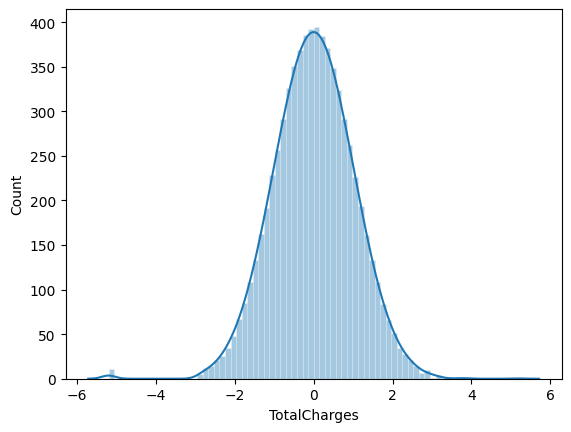

In [44]:
sns.histplot(data=qt_df, x='TotalCharges', stat='count', **common_args)

In [45]:
# 학습/예측 데이터 분류
X_train, y_train, X_test, y_test = split_train_test(qt_df, 0.8, separate=True, label_name='Churn')

학습 데이터: 5634개, 예측 데이터: 1409개


In [46]:
# 정확도 측정
acc = test_model(DecisionTreeClassifier(), X_train, y_train, X_test, feature_names)[2]
print(f"정확도는 {acc}입니다")

정확도는 74.02413058907025입니다


이번에도 비슷한 정확도로 큰 변화를 관측하지 못했습니다.

## 3.1.4 Tenure, MonthlyCharges, TotalCharges 스케일링

정규화(Normalization)는 일반적으로 서로 다른 변수의 크기를 통일하기 위해

$\frac{x_{i} - min(x)}{max(x) - min(x))}$ 을 적용해주는 기법입니다.

Scikit-learn에서 제공하는 정규화 알고리즘인 MinMaxScaler로 수치형 변수들을 정규화 하겠습니다.

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(qt_df[["tenure", "MonthlyCharges", "TotalCharges"]])
scale = scaler.transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])

In [48]:
scaled_df = encoded_df.copy()
scaled_df[["tenure", "MonthlyCharges", "TotalCharges"]] = scale

In [49]:
# 스케일링 완료한 데이터로 학습/예측 데이터셋 분류
X_train, y_train, X_test, y_test = split_train_test(scaled_df, 0.8, separate=True, label_name='Churn')

학습 데이터: 5634개, 예측 데이터: 1409개


In [50]:
model3, y_predict3, acc3 = test_model(DecisionTreeClassifier(), X_train, y_train, X_test, feature_names)
print(f"정확도는 {acc3}입니다")

정확도는 73.95315826827537입니다


이번에도 유의미한 변화를 보지 못했습니다.

### 3.1.5 모델 파라미터 변경하기
비록 이번 강의에서 사용한 방법은 아니나, DecisionTreeClassifier의 depth를 제어해 주겠습니다.

In [51]:
# 직접적으로 모델 파라미터 설정
classifier_dt = DecisionTreeClassifier(random_state = 33, max_depth = 4, min_samples_leaf = 1)

In [52]:
model4, y_predict4, acc4 = test_model(classifier_dt, X_train, y_train, X_test, feature_names)
print(f"정확도는 {acc4}입니다")

정확도는 79.91483321504613입니다


## 3.2 결론

비록 여러 방법으로 데이터 전처리를 하여 모델링을 해보았으나, 모델 파라미터를 설정하는 것 빼곤 유의미한 결과를 얻지 못하였습니다.